In [1]:
# 1) Mean/Median Age (Age_Days) - Descriptive Statistics Mean/IQR
# 2) Mean/Median Weight (WT_KGS) - Descriptive Statistics Mean/IQR
# 3) Gender distribution (GENDER) - significant differences? - One Way Chi Squre
# 4) Most common Breeds (BREED) - One Way Chi Squre
# 5) Most common shunts (SHUNT) - One Way Chi Squre
# 6) Most common portal vein origin (PORTAL_V) - One Way Chi Squre
# 7) Most common systemic vein insertion (SYSTEM_V) - One Way Chi Squre
# 8) Most common contributing vessels (CONTRB_V) - One Way Chi Squre
# 9) PP score distribution (PP_Score) - One Way Chi Squre and Descriptive Statistics Mean/IQR (age, wt, and pps_n are set as continuous exploratory)

# Cross tab frequencies and ANOVA
# HOSPITAL COMPARISONS (HOSPITAL):
# 10) Do the above values differ AMONG HOSPITALS (HOSPITAL) - Two Way Chi Squre (Comprehensive pairwise comparisons reveals)

# Cross tab frequencies and ANOVA
# COUNTRY COMPARISONS (COUNTRY):
# 11) Do the above values differ AMONG COUNTRIES (COUNTRY)  - Two Way Chi Squre (Comprehensive pairwise comparisons reveals)

# Cross tab frequencies and ANOVA
# BREED COMPARISONS (BREED): [5 MOST COMMON BREEDS]
# 12) What is Gender distribution (GENDER) comparison among 5 most common breeds (BREED)? - Two Way Chi Squre (Comprehensive pairwise comparisons reveals)
# 13) What is Age distribution (Age_Days) comparison among 5 most common breeds (BREED)? - Sub ANOVA limited to breeds 61, 38, 53, 35, 47
# 14) What are 5 most common Shunts  (SHUNT) comparison among 5 most common breeds (BREED)? - Two Way Chi Squre (Comprehensive pairwise comparisons reveals)
# 15) What is PP Score (PP_Score) comparison among 5 most common breeds (BREED)? # Probably best looked at categorically with two-way
# comprehensive chi-square for contingency table first time (Comprehensive pairwise comparisons reveals)


# Regression and ANOVA
# AGE COMPARISONS (Age_Days):
# 16) Does AGE (Age_Days) correlate with Breed (BREED) - RQ 13 handles this with age as DV and Breed (Top 5) as IV with 5 class levels fo breed
# 17) Does AGE (Age_Days) correlate with PP Score (PP_Score) - Standard ANOVA but similar issue with shunt type having a lot of cats, see 18
# 18) Does AGE (Age_Days) correlate with Shunt (SHUNT) - There are 44 different shunt types (shunt type is not ordinal) and age is continuous. 
#  An ANOVA would 
# not yield meaningful results iwth the 44 goups giving a mean age for pairise comparisons.  We could contribute collapsing shunt and 
# bucketing age.


# SHUNT COMPARISONS (SHUNT) ANOVA:
# 19) Does Shunt (SHUNT) correlate with Weight (WT_KGS)    [Above and below mean/median?] - see 20
# 20) Does Shunt (SHUNT) correlate with PP Score (PP_Score) There are 44 different shunt types (non-ordinal) and 11 (with one missing) pp Score.  
# This could be a 
# either a huge cross tab or a difficlt it interpret ANOVA.   Need to define DV/IV an consider collpasing (top 5?) Shunt Type. See 17 and 18

# Breed ANOVA and Cross Tab
# These (21, 22, 23) are all caegorical with multiple and in most cases non-ordinal categorization making inelgible for regression and 
# multiple categories difficult to interpret with thin data classes for ANOVA.  Suggest first round (Comprehensive pairwise comparisons reveals)
# 21) Does PV origin (PORTAL_V) correlate with breed (BREED) # Cross Tab Frequency - Two Way Chi Square
# 22) Does systemic v insertion (SYSTEM_V) correlate with breed (BREED) # Cross Tab Frequency - Two Way Chi Square
# 23) Do contributing vessels (CONTRB_V) correlate with breed (BREED) # Cross Tab Frequency - Two Way Chi Square

In [1]:
from tabulate import tabulate
import os, saspy, itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
today = datetime.today().strftime("%Y-%m-%d")
now = datetime.now()

#Stats Import
from scipy.stats import wilcoxon 
from scipy.stats import shapiro 
from scipy.stats import kstest
# from numpy.random import seed
# from numpy.random import math

import pingouin as pg
from pingouin import pairwise_ttests, pairwise_tukey, pairwise_gameshowell
import statsmodels.stats.multicomp as mc
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
# from scipy import stats # Might need as is for ttest proportiality z or tdist
import statsmodels.api as sm
from bioinfokit.analys import stat
from statsmodels.formula.api import ols
from scipy.stats import wilcoxon

import io
from io import BytesIO
import base64


sys.path.append(os.path.join(sys.path[0],'C:\Junk\lamb_consulting'))
# sys.path.append(os.path.join(sys.path[0],'U:\lamb_consulting'))


# import cox, means, regressions

from lamb_consulting import *

from lamb_consulting.means import means_desc, means_desc_class, aov
from lamb_consulting.freqs import freqs, chi_contingency, chi_oneway
from lamb_consulting.export import export_to_Excel
# from lamb_consulting.regressions import ols, regression_plot
from lamb_consulting.cox import cox
from lamb_consulting.kaplan_meier import km,km_plots


def freqme(ds,var1):
    f=ds[var1].value_counts(dropna=False)
    p=ds[var1].value_counts(normalize=True)
    df=pd.concat({f,p}, axis=1, keys=['frequency', 'percent'])
    df["cumfrequency"] = df["frequency"].cumsum()
    df["cumpercent"] = df["percent"].cumsum()
    return df



# For figure image to base 64 writing

def fig_to_base64(fig):
    img = io.BytesIO()
    fig.savefig(img, format='png',
                bbox_inches='tight')
    img.seek(0)

    return base64.b64encode(img.getvalue())

C:\Users\Ken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
print(os.getcwd())
tpath = "C:/Junk/Weisse/EHPSS/"
# tpath = "U:/Fox/Weisse/EHPSS/"
fn="EHPSS20221207"

extension='.xlsx'
file = tpath+fn+extension

df_in = pd.read_excel((file), sheet_name='Data')




# Filter out age lt 90d 
df = df_in.loc[(df_in['age_d']>=90)]
df['contrb_v'].fillna(method='ffill')
df['wt_kg'].fillna(method='ffill')


df = df_in.loc[(df_in['age_d']>=90)]


df = df.loc[(df['age_d']>=90) & (df['age_d'] =90) ]


tmp_mask = tmp_prec['tot'] == i) & (tmp_prec['monthy_year'] == j)
#         tmp = tmp_prec.loc[tmp_mask]



# 50%        733.000000
def age_lt_730(row):
    if row["age_d"] <= 730:
        return 1
    elif row["age_d"] > 730:
        return 0
    else:
        return -1


def male_n(row):
    if row["gender"] == 1 or row["gender"] == 2:
        return 1
    elif row["gender"] == 3 or row["gender"] == 4:
        return 0
    else:
        return -1


def male_c(row):
    if row["gender_1"] == 'MC' or row["gender_1"] == 'MI' or row["gender_1"] == 'NM' or row["gender_1"] == 'MN' or row["gender_1"] == 'ME' or row["gender_1"] == 'M':
        return "M"
    elif row["gender_1"] == 'FS' or row["gender_1"] == 'FI' or row["gender_1"] == 'FE': 
        return "F"
    else:
        return "error"


df['male_n'] = df.apply(male_n,axis=1)
df['male_c'] = df.apply(male_c,axis=1)
df['age_lt_730'] = df.apply(age_lt_730,axis=1)


cont = ['age_d', 'wt_kg', 'pps_n']
cont_noage = ['wt_kg', 'pps_n']
cat = ['male_n', 'breed_n', 'shunt_ty', 'portal_v', 'system_v', 'contrb_v', 'hospital', 'country', 'pps_n']
cat_nopps = ['male_n', 'breed_n', 'shunt_ty', 'portal_v', 'system_v', 'contrb_v', 'hospital', 'country']


# cont_describe = "age_d wt_kg pps_n"
# cat_describe = "male_c breed_nc shunt_ty portal_v system_v contrb_v hospital country pps_n"


# print(df["gender_1"].value_counts())
# print(df["gender"].value_counts())

# print(df["male_c"].value_counts())
# print(df["male_n"].value_counts())


c:\Junk\Weisse\EHPSS


C:\Users\Ken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Ken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Ken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local

# One Way Frequency

In [3]:

my_list = cat.copy()
my_list.remove("breed_n")
my_list += ['breed_n']

my_list += ['age_lt_730']


cat_one = pd.DataFrame()
for i in my_list:
    cat_one = cat_one.append(chi_oneway(df,i))


cat_one


,table,var_level,frequency,percent,cumfrequency,cumpercent,p_value
0,Table male_n,0.0,561,0.529245,561,0.529245,0.056869
1,Table male_n,1.0,499,0.470755,1060,1.000000,0.056869
0,Table shunt_ty,1.0,292,0.275472,292,0.275472,0.000000
1,Table shunt_ty,2.0,201,0.189623,493,0.465094,0.000000
2,Table shunt_ty,3.0,159,0.150000,652,0.615094,0.000000
...,...,...,...,...,...,...,...
59,Table breed_n,28.0,1,0.000943,1058,0.998113,0.000000
60,Table breed_n,10.0,1,0.000943,1059,0.999057,0.000000
61,Table breed_n,32.0,1,0.000943,1060,1.000000,0.000000
0,Table age_lt_730,0.0,540,0.509434,540,0.509434,0.539020


# Create Top 5 Breed dataset based of of the one-way Chi-Squre Output

In [4]:
# breed_t5_list = [61, 38, 53, 35, 47]
breed_t5_list = df['breed_n'].value_counts().keys()[0:5].sort_values(ascending=False).tolist()
breed_mask = (df['breed_n'].isin(breed_t5_list)) 
breed_t5 = df.loc[breed_mask]
print(breed_t5_list)
print(df.shape)
print(breed_t5.shape)

[61.0, 53.0, 47.0, 38.0, 35.0]
(1060, 29)
(597, 29)


# Two Way Frequency

In [4]:
my_list = cat.copy()
my_list += ['age_lt_730']

iter_list = list(itertools.combinations(my_list, 2))
iter_list

print(len(iter_list))
cross_cat = pd.DataFrame()

ct = 0

if ct ==1:
    f = open('ct.html','w')

my_len = (len(iter_list))
for i in range(0, len(iter_list)):
    # print(i)
    res = [iter_list[i]]
    a = res[0] 
    v1,v2 = a
    cross_tmp, my_df = chi_contingency(df,v1,v2,"1","chi_cont")
    cross_cat = cross_cat.append(cross_tmp)
    if ct ==1:
        my_html = my_df.to_html()
        f.write("The Cross Tabular variables are {} and {}.".format(v1, v2))
        f.write(my_html)

if ct ==1:
    f.close()


cross_cat.tail(5)


45


,r_q_n,analysis,research_q,Table,Frequency,Percent,Missing,iv1,iv2
6,1,chi_cont,1,Table pps_n * age_lt_730,100,9.469697,.,4.0,0
7,1,chi_cont,1,Table pps_n * age_lt_730,66,6.250000,.,4.0,1
8,1,chi_cont,1,Table pps_n * age_lt_730,271,25.662879,.,5.0,0
9,1,chi_cont,1,Table pps_n * age_lt_730,137,12.973485,.,5.0,1
10,1,chi_cont,1,Table pps_n * age_lt_730,1056,100.000000,0,.,.


In [6]:
cross_cat.tail(25)

,r_q_n,analysis,research_q,Table,Frequency,Percent,Missing,iv1,iv2
16,1,chi_cont,1,Table country * pps_n,7,0.662879,.,3,2.0
17,1,chi_cont,1,Table country * pps_n,16,1.515152,.,3,3.0
18,1,chi_cont,1,Table country * pps_n,30,2.840909,.,3,4.0
19,1,chi_cont,1,Table country * pps_n,81,7.670455,.,3,5.0
20,1,chi_cont,1,Table country * pps_n,1056,100.000000,0,.,.
0,1,chi_cont,1,Table country * age_lt_730,410,38.679245,.,0,0
1,1,chi_cont,1,Table country * age_lt_730,391,36.886792,.,0,1
2,1,chi_cont,1,Table country * age_lt_730,31,2.924528,.,1,0
3,1,chi_cont,1,Table country * age_lt_730,30,2.830189,.,1,1
4,1,chi_cont,1,Table country * age_lt_730,18,1.698113,.,2,0


# Descriptive Means first Overall then by Class

In [7]:

m_desc = pd.DataFrame()
m_class = pd.DataFrame()

for i in cont:
        desc_tmp = means_desc(df, i)
        m_desc = m_desc.append(desc_tmp)

print(m_desc)

for i in cat:
    for j in cont:
        desc_class_tmp = means_desc_class(df,j, i)
        m_class = m_class.append(desc_class_tmp)

print(m_class)



      ds  nmiss       n         mean  median          std    min      max  \
0  age_d      0  1059.0  1456.997356  733.00  3702.599491  93.00  41319.0   
0  wt_kg     14  1045.0     4.841608    4.45     2.623598   0.83     12.0   
0  pps_n      4  1055.0     3.358294    4.00     1.624809   1.00      5.0   

     p25      p75  
0  311.5  1760.50  
0    2.7     6.35  
0    2.0     5.00  
        ds  level    var  nmiss      n         mean  median          std  \
0   male_n    1.0  age_d    0.0  498.0  1378.391566   704.5  3148.919269   
1   male_n    0.0  age_d    0.0  561.0  1526.775758   749.0  4134.020716   
0   male_n    1.0  wt_kg    4.0  494.0     5.245101     4.8     2.715480   
1   male_n    0.0  wt_kg   10.0  551.0     4.479855     4.0     2.485703   
0   male_n    1.0  pps_n    2.0  496.0     3.471774     4.0     1.591394   
..     ...    ...    ...    ...    ...          ...     ...          ...   
1    pps_n    5.0  pps_n    0.0  408.0     5.000000     5.0     0.000000   
2  

# Diffs with Tukeys Adjustment

In [ ]:
# Set up affectionate naming for stratified LOB
# lob_dict_in = {1:['lob_auto'], 2:['lob_hl'], 3:['lob_wfvc']}
lob_dict_in = {1:['df']}
lob_df = pd.DataFrame(lob_dict_in)
lob_df = lob_df.T.reset_index()
lob_df.rename(columns={0: 'ds_name', 'index': 'df_num'}, inplace = True)


# Set up affectionate Dict naming for DV
dv_dict_in = {1:['wt_kg'], 2:['age_d'], 3:['pps_n']}
dv_df = pd.DataFrame(dv_dict_in)
dv_df = dv_df.T.reset_index()
dv_df.rename(columns={0: 'dv_name', 'index':'dv_num'}, inplace=True)


# Set up Dict for Model ID to b merge from above dict
# lob_ds = {1:lob_auto, 2:lob_hl, 3:lob_wfvc}
lob_ds = {1:df}

res = stat()
data_dict = {}
mt_data = pd.DataFrame()

# Set normality statistics
normal_on = 1
if normal_on != 0:
    f = open('my_normality.html','w')


# Set up dict for Full DVs Full Rank but Catgetoricals with No PPSN
dvs = {1:'wt_kg', 2:'age_d', 3:'pps_n'}
# Created new list with pps removed as IV for use as a DV
# for i in cat:
for i in cat_nopps:
    for k1,v1 in dvs.items():
        for k, v in lob_ds.items():
            anova_df = df.loc[:,[v1,i]].dropna()
            # res.tukey_hsd(df=v, res_var=v1, xfac_var=i, anova_model=v1 + ' ~ C(' + i + ')')
            res.tukey_hsd(df=anova_df, res_var=v1, xfac_var=i, anova_model=v1 + ' ~ C(' + i + ')')
            #Normality Section
            if normal_on !=0:
                my_shapiro = shapiro(res.anova_std_residuals)
                my_shapiro = str(my_shapiro)
                my_ks = kstest(res.anova_std_residuals, 'norm')
                my_ks = str(my_ks)

                # residuals qq
                sm.qqplot(res.anova_std_residuals,line='45')
                plt.xlabel('Theoretic Quantiles '+ v1+ ' ' + i)
                plt.ylabel("Standardized Residuals")
                my_fig0 = plt
                encoded0 = fig_to_base64(my_fig0)
                my_html0 = '<img src="data:image/png;base64, {}">'.format(encoded0.decode('utf-8'))
                f.write("The residuals normality plot is based upon {} and {} and KS is {} and Shapiro is {}.".format(v1, i, my_ks, my_shapiro))
                f.write(my_html0)

                # residuals histogram
                my_fig1 = plt.figure()
                plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
                plt.xlabel('Residuals' + ' ' + i + ' ' + v1)
                plt.ylabel('Frequency')
                plt.show()

                # Histogram Writing
                tmpfile = BytesIO()
                my_fig1.savefig(tmpfile, format='png')            
                encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
                # encoded = base64.b64encode(tmpfile.getvalue()).decode('utf8') <img src='data:image/png;base64,{{}}'>
                my_html1 = '---' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + '---'
                f.write("The histogram normality plot is based upon {} and {} and KS is {} and Shapiro is {}.".format(v1, i, my_ks, my_shapiro))
                f.write(my_html1)



            tmp = res.tukey_summary
            tmp['df_num'] = k
            tmp['dv_num'] = k1
            tmp['iv'] = i
            data_dict[k] = tmp
            mt_data = mt_data.append(data_dict[k])



# Get PPN as Sole IV with Wt and Age as DV
# Had to remove pps_n as a DV since it was an IV with dropna analysis
dvs = {1:'wt_kg', 2:'age_d'}
# for i in cat:
cat_pps_n = ['pps_n']
for i in cat_pps_n:
    for k1,v1 in dvs.items():
        for k, v in lob_ds.items():
            anova_df = df.loc[:,[v1,i]].dropna()
            res.tukey_hsd(df=anova_df, res_var=v1, xfac_var=i, anova_model=v1 + ' ~ C(' + i + ')')

            #Normality Section
            if normal_on !=0:
                my_shapiro = shapiro(res.anova_std_residuals)
                my_shapiro = str(my_shapiro)
                my_ks = kstest(res.anova_std_residuals, 'norm')
                my_ks = str(my_ks)
                # residuals qq
                sm.qqplot(res.anova_std_residuals,line='45')
                plt.xlabel('Theoretic Quantiles '+ v1+ ' ' + i)
                plt.ylabel("Standardized Residuals")
                plt.show()

                my_fig3 = plt
                encoded3 = fig_to_base64(my_fig3)
                my_html3 = '<img src="data:image/png;base64, {}">'.format(encoded3.decode('utf-8'))
                f.write("The residuals normality plot is based upon {} and {} and KS is {} and Shapiro is {}.".format(v1, i, my_ks, my_shapiro))
                f.write(my_html3)

                # residuals histogram
                my_fig4 = plt.figure()
                plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
                plt.xlabel('Residuals' + ' ' + i + ' ' + v1)
                plt.ylabel('Frequency')
                plt.show()

                # Histogram Writing
                tmpfile = BytesIO()
                my_fig4.savefig(tmpfile, format='png')            
                encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
                my_html4 = '---' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + '---'
                f.write("The histogram normality plot is based upon {} and {} and KS is {} and Shapiro is {}.".format(v1, i, my_ks, my_shapiro))
                f.write(my_html4)


            tmp = res.tukey_summary
            tmp['df_num'] = k
            tmp['dv_num'] = k1
            tmp['iv'] = i
            data_dict[k] = tmp
            mt_data = mt_data.append(data_dict[k])




# Get Age LT 730 as Sole IV with Wt and wt and PPS
# Had to remove pps_n as a DV since it was an IV with dropna analysis
dvs = {1:'wt_kg', 2:'pps_n'}
# for i in cat:
cat_age_lt_730_n = ['age_lt_730']
for i in cat_age_lt_730_n:
    for k1,v1 in dvs.items():
        for k, v in lob_ds.items():
            anova_df = df.loc[:,[v1,i]].dropna()
            res.tukey_hsd(df=anova_df, res_var=v1, xfac_var=i, anova_model=v1 + ' ~ C(' + i + ')')

            #Normality Section
            if normal_on !=0:
                my_shapiro = shapiro(res.anova_std_residuals)
                my_shapiro = str(my_shapiro)
                my_ks = kstest(res.anova_std_residuals, 'norm')
                my_ks = str(my_ks)
                # residuals qq
                sm.qqplot(res.anova_std_residuals,line='45')
                plt.xlabel('Theoretic Quantiles '+ v1+ ' ' + i)
                plt.ylabel("Standardized Residuals")
                plt.show()

                my_fig5 = plt
                encoded5 = fig_to_base64(my_fig5)
                my_html5 = '<img src="data:image/png;base64, {}">'.format(encoded5.decode('utf-8'))
                f.write("The residuals normality plot is based upon {} and {} and KS is {} and Shapiro is {}.".format(v1, i, my_ks, my_shapiro))
                f.write(my_html5)

                # residuals histogram
                my_fig6 = plt.figure()
                plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
                plt.xlabel('Residuals' + ' ' + i + ' ' + v1)
                plt.ylabel('Frequency')
                plt.show()

                # Histogram Writing
                tmpfile = BytesIO()
                my_fig6.savefig(tmpfile, format='png')            
                encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
                my_html6 = '---' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + '---'
                f.write("The histogram normality plot is based upon {} and {} and KS is {} and Shapiro is {}.".format(v1, i, my_ks, my_shapiro))
                f.write(my_html6)


            tmp = res.tukey_summary
            tmp['df_num'] = k
            tmp['dv_num'] = k1
            tmp['iv'] = i
            data_dict[k] = tmp
            mt_data = mt_data.append(data_dict[k])



diffs = pd.merge(mt_data, lob_df, on=["df_num"])
diffs = pd.merge(diffs, dv_df, on=["dv_num"])
diffs

if normal_on != 0:
    f.close()


# Wilcoxon for Age

In [18]:
print(df.groupby('male_n')['age_d'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))
df_wide = pd.pivot(df, index=['pt_num'], columns = 'male_n',values = 'age_d').reset_index()

df_wide = df_wide.rename(columns={0: "a", 1: "b"})
stats.wilcoxon(df_wide['a'], df_wide['b'])


        count         mean          std   min    10%    25%    50%     75%  \
male_n                                                                       
0       561.0  1526.775758  4134.020716  93.0  184.0  306.0  749.0  1640.0   
1       499.0  1376.727455  3145.975746  95.0  178.6  315.5  702.0  1820.5   

           90%      max  
male_n                   
0       2647.0  41317.0  
1       2773.2  41319.0  


WilcoxonResult(statistic=0.0, pvalue=5.465896991624172e-175)

# Prob TTDIST from Excel Proportionality

In [16]:
# From Excel Example
# https://stackoverflow.com/questions/56991534/excels-tdist-in-scipy
# from scipy import stats
stats.t.sf(.66299299354, df=9999999999999) * 2


0.5073350414125459

In [37]:
my_df_ct = df.copy()
# tmp_mask = (my_df_ct['country']==0) & (my_df_ct['pps_n'].isin([0, 2])), ['male_n','breed_n']
tmp_mask = (my_df_ct['country']==0) & (my_df_ct['pps_n'].isin([1, 5])), ['country', 'pps_n', 'male_n','breed_n']
# This just gives male_n and breed with filter applied
tmp = my_df_ct.loc[tmp_mask]
tmp.pps_n.unique
# my_df_ct.loc[(my_df_ct['country']==0) & (my_df_ct['pps_n']isin([0, 2]),
#                     ['male_n','breed_']])

# k_cross_tmp, k_my_df = chi_contingency(my_df_ct,"country","pps_n","t","t_chi_cont")

<bound method Series.unique of 0       1.0
1       5.0
2       5.0
8       5.0
9       5.0
       ... 
1076    5.0
1077    5.0
1078    1.0
1079    1.0
1081    5.0
Name: pps_n, Length: 512, dtype: float64>

In [41]:
pd.crosstab(tmp.country,tmp.pps_n)

pps_n,1.0,5.0
country,,
0,213,299


In [40]:
cross_tmp, my_df = chi_contingency(tmp,"country","pps_n","1","chi_cont")
print(cross_tmp)
print(my_df)

  r_q_n  analysis research_q                  Table  Frequency     Percent  \
0     1  chi_cont          1  Table country * pps_n        213   41.601562   
1     1  chi_cont          1  Table country * pps_n        299   58.398438   
2     1  chi_cont          1  Table country * pps_n        512  100.000000   

  Missing iv1  iv2  
0       .   0  1.0  
1       .   0  5.0  
2       0   .    .  
pps_n    1.0  5.0
country          
0        213  299


In [36]:

f=df["pps_n"].value_counts(dropna=False)
p=df["pps_n"].value_counts(normalize=True)

print(f)
print(p)
# my_df=pd.concat({f,p}, axis=1, keys=['frequency', 'percent'])
    # df["cumfrequency"] = df["frequency"].cumsum()
    # df["cumpercent"] = df["percent"].cumsum()


# def freqme(ds,var1):
#     f=ds[var1].value_counts(dropna=False)
#     p=ds[var1].value_counts(normalize=True)
#     df=pd.concat({f,p}, axis=1, keys=['frequency', 'percent'])
#     df["cumfrequency"] = df["frequency"].cumsum()
#     df["cumpercent"] = df["percent"].cumsum()
#     return df



5.0    408
1.0    259
4.0    166
3.0    135
2.0     88
NaN      4
Name: pps_n, dtype: int64
5.0    0.386364
1.0    0.245265
4.0    0.157197
3.0    0.127841
2.0    0.083333
Name: pps_n, dtype: float64


AttributeError: module 'pandas' has no attribute 'tools'

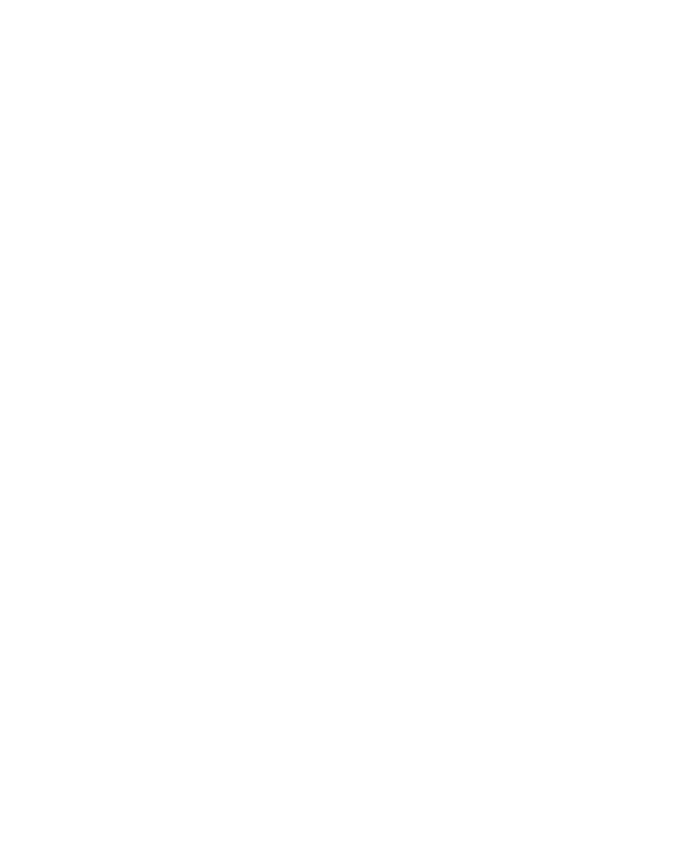

In [20]:
# print(df['age_d'].groupby['male_n'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))

print(df.groupby('male_n')['age_d'].describe())

res = wilcoxon(df['age_d'])
res.statistic, res.pvalue




df_wide = pd.pivot(df, index=['pt_num'], columns = 'male_n',values = 'age_d').reset_index()

df_wide = df_wide.rename(columns={0: "a", 1: "b"})


stats.wilcoxon(df_wide['a'], df_wide['b'])



cross_tmp1 = pd.crosstab(df['pps_n'].fillna('.'),df['shunt_ty'].fillna('.'))
# con = chi2_contingency(df,correction=False)
cross_tmp1

pp = PdfPages('Sample.pdf')
fn_print_pdf(cross_tmp,pp)
fn_print_pdf(cross_tmp1,pp)   
pp.close()
# crosstab_normalized = cross_tmp.div(cross_tmp.sum(1).astype(float), axis=0)
# crosstab_normalized.plot(kind='bar', stacked=True, 
# title='Default by ' + str('male_n') + ' class')
# plt.savefig("class.pdf") #outputs blank file


# ANOVA of continuous vars with top 5 Breed IV

In [11]:

res = stat()
data_dict = {}
t5_breed_data = pd.DataFrame()

dvs = {1:'wt_kg', 2:'age_d', 3:'pps_n'}

cat_breed = ['breed_n']
ds_breed = {1:breed_t5}

for i in cat_breed:
    for k1,v1 in dvs.items():
        for k, v in ds_breed.items():
            res.tukey_hsd(df=v, res_var=v1, xfac_var=i, anova_model=v1 + ' ~ C(' + i + ')')
            tmp = res.tukey_summary
            tmp['df_num'] = k
            tmp['dv_num'] = k1
            tmp['iv'] = i
            data_dict[k] = tmp
            t5_breed_data = t5_breed_data.append(data_dict[k])


breed_diffs = pd.merge(t5_breed_data, lob_df, on=["df_num"])
breed_diffs = pd.merge(breed_diffs, dv_df, on=["dv_num"])
breed_diffs

,group1,group2,Diff,Lower,Upper,q-value,p-value,df_num,dv_num,iv,ds_name,dv_name
0,53.0,35.0,2.313294,1.210279,3.416308,8.154610,0.001000,1,1,breed_n,df,wt_kg
1,53.0,61.0,2.537859,1.485706,3.590011,9.378696,0.001000,1,1,breed_n,df,wt_kg
2,53.0,38.0,0.134324,-1.088564,1.357212,0.427092,0.900000,1,1,breed_n,df,wt_kg
3,53.0,47.0,1.870511,0.539199,3.201822,5.463036,0.001360,1,1,breed_n,df,wt_kg
4,35.0,61.0,0.224565,-0.685496,1.134626,0.959457,0.900000,1,1,breed_n,df,wt_kg
5,35.0,38.0,2.447618,1.344603,3.550633,8.628117,0.001000,1,1,breed_n,df,wt_kg
6,35.0,47.0,4.183804,2.961684,5.405924,13.311015,0.001000,1,1,breed_n,df,wt_kg
7,61.0,38.0,2.672183,1.620031,3.724336,9.875093,0.001000,1,1,breed_n,df,wt_kg
8,61.0,47.0,4.408369,3.231951,5.584788,14.570341,0.001000,1,1,breed_n,df,wt_kg
9,38.0,47.0,1.736186,0.404874,3.067498,5.070727,0.003727,1,1,breed_n,df,wt_kg


In [13]:
my_sheets = ['cat_one' 'cross_cat' 'm_desc' 'm_class' 'diffs' 'breed_diffs']

writer = pd.ExcelWriter('ephss_out_20221219a.xlsx', engine = 'xlsxwriter')
# for i in my_sheets:
#     [i].to_excel(writer,sheet_name=i)
cat_one.to_excel(writer,sheet_name='cat_one')
cross_cat.to_excel(writer,sheet_name='cross_cat')
m_desc.to_excel(writer,sheet_name='m_desc')
m_class.to_excel(writer,sheet_name='m_class')
dt_diffs.to_excel(writer,sheet_name='dt_diffs')
breed_diffs.to_excel(writer,sheet_name='breed_diffs')
writer.save()


In [4]:
my_sheets = ['df']

writer = pd.ExcelWriter('df.xlsx', engine = 'xlsxwriter')
# for i in my_sheets:
#     [i].to_excel(writer,sheet_name=i)
df.to_excel(writer,sheet_name='data')
writer.save()


# Overall F Test

In [8]:

#Init Dict for DF to fill
data_dict = {}
mt_data  = pd.DataFrame()


# Set up affectional naming for stratified LOB
# lob_dict_in = {1:['lob_auto'], 2:['lob_hl'], 3:['lob_wfvc']}
lob_dict_in = {1:['df']}
lob_df = pd.DataFrame(lob_dict_in)
lob_df = lob_df.T.reset_index()
lob_df.rename(columns={0: 'ds_name', 'index': 'df_num'}, inplace = True)

# Python - Post-Hoc test for one-way ANOVA
# https://www.youtube.com/watch?v=BOGCsSzQNR4


# Set up affection Dict naming for DV
# dv_dict_in = {1:['sentiment'], 2:['count of calls']}
dv_dict_in = {1:['wt_kg'], 2:['age_d'], 3:['pps_n']}
dv_df = pd.DataFrame(dv_dict_in)
dv_df = dv_df.T.reset_index()
dv_df.rename(columns={0: 'dv_name', 'index':'dv_num'}, inplace=True)


# Set up Dict for Model ID to b merge from above dict
# lob_ds = {1:lob_auto, 2:lob_hl, 3:lob_wfvc}
lob_ds = {1:df}
# Set up dict for DVs
dvs = {1:'wt_kg', 2:'age_d', 3:'pps_n'}

for i in cat:
    for k1,v1 in dvs.items():
        for k,v in lob_ds.items():
            model = ols(v1 + ' ~ C(' + i + ')', data =v).fit()
            tmp = sm.stats.anova_lm(model, type=2) #typ = 2 also works
            tmp['df_num'] = k
            tmp['dv_num'] = k1
            tmp['iv'] = i
            data_dict[k] = tmp
            mt_data = mt_data.append(data_dict[k])


df_ftest = pd.merge(mt_data, lob_df, on=["df_num"])
df_ftest = pd.merge(df_ftest, dv_df, on=["dv_num"])
df_ftest



,df,sum_sq,mean_sq,F,PR(>F),df_num,dv_num,iv,ds_name,dv_name
0,1.0,1.428432e+02,1.428432e+02,2.108325e+01,4.921757e-06,1,1,male_n,df,wt_kg
1,1065.0,7.215583e+03,6.775195e+00,NaN,NaN,1,1,male_n,df,wt_kg
2,62.0,3.541848e+03,5.712658e+01,1.495010e+01,2.129818e-103,1,1,breed_n,df,wt_kg
3,990.0,3.782940e+03,3.821152e+00,NaN,NaN,1,1,breed_n,df,wt_kg
4,43.0,5.142936e+02,1.196032e+01,1.787722e+00,1.563244e-03,1,1,shunt_ty,df,wt_kg
5,1023.0,6.844132e+03,6.690256e+00,NaN,NaN,1,1,shunt_ty,df,wt_kg
6,8.0,1.937846e+02,2.422308e+01,3.577013e+00,4.177852e-04,1,1,portal_v,df,wt_kg
7,1058.0,7.164641e+03,6.771873e+00,NaN,NaN,1,1,portal_v,df,wt_kg
8,8.0,1.840302e+02,2.300377e+01,3.392340e+00,7.438002e-04,1,1,system_v,df,wt_kg
9,1058.0,7.174396e+03,6.781092e+00,NaN,NaN,1,1,system_v,df,wt_kg


In [ ]:
# my_list = cont.copy()
# my_list += ['male_c']



# print(cont)
# print(type(cont))
# my_list = cont.copy()
# print(my_list)
# print(type(my_list))
# my_list += ['male_c']
# print(my_list)


# my_df = df[df.columns[df.columns.isin(my_list)]]

# print(my_df)
# my_df1 = df['wt_kg'].groupby(['male_c']).describe()
# df_2 = pd.DataFrame(df['wt_kg'].describe().tolist(), columns = ['Test2'])
# df_2 = pd.DataFrame(df['wt_kg'].groupby([male_c']).describe(), columns = ['Test2'])
# tmp = df.groupby(['male_c']).mean().reset_index()
# print(tmp)

# ds_counts = df["ds_size"].unique().tolist()
# dt_counts = df["month_year"].unique().tolist()

# blank_df = pd.DataFrame()
# for j in dt_counts:
#     for i in ds_counts:
#         tmp_prec = df.copy()
#         tp_prec = tmp_prec[['tot', 'recall', 'month_year']]
#         tmp_mask = (tmp_prec['tot'] == 1) & (tmp_prec['month_year'] == j)
#         tmp = tmp_prec.loc[tmp_mask]
#         tmp_df = tmp.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
#         tmp_df = tmp_df.T
#         tmp_df['ds_size'] = i
#         tmp_df['dt'] = j
#         blank_df = blank_df.append(tmp_df)

# print(blank_df.head(5))
# print(blank_df.tail(5))
# print(len(blank_df))


In [ ]:
# aov1 = aov(npl,"age_d","male_c",1)
# aov1 = aov(npl,"wt_kg","male_c",1)
# aov1 = aov(npl,"pps_n","male_c",1)
# aov1


def aovme(iv):
    # blank_aov = pd.DataFrame()
    for i in cont:
        tmp = df.copy()
        tmp_df = aov(tmp,i,iv,1)        
        tmp_df['dv'] = i
        tmp_df['iv'] = iv
        print(tmp_df)
        blank_aov = blank_aov.append(tmp_df)        
    return blank_aov
        


# cat = ['male_n', 'breed_c', 'shunt_ty', 'portal_v', 'system_v', 'contrb_v', 'hospital', 'country', 'pps_c']
# my_aov = aovme('male_c')
# my_aov = aovme('shunt_ty') # Too many levels for ANOVA
# aovme('breed') # Too many levels for ANOVA
# my_aov = aovme('portal_v') # Too many levels for ANOVA
# my_aov = aovme('system_v') # Too many levels for ANOVA
my_aov = aovme('contrb_v') # Too many levels for ANOVA


# print(blank_aov.head(5))
# print(blank_aov.tail(5))
# print(len(blank_aov))
# breed_c shunt_ty portal_v sysem_v contrb_v hospital country pps_c

: 

In [63]:
# s = sorted([str(round(i * 100, 1)) for i in npl['age_d']])
s = sorted([str(round(i * .01, 2)) for i in npl['age_d']])


s = (
    pd.Series(s)
    .groupby([str(int(float() )) for i in s])
    .apply(lambda group: "".join((x[-1] for x in group)))
    .reset_index()
)

print("\n".join(s['index'] + ' | ' + s[0]))

stemme = ("\n".join(s['index'] + ' | ' + s[0]))

stemmedf = pd.DataFrame([x.split(';') for x in stemme.split('\n')])

0 | 500000000000045688889999991111111122222222222223333333333333334444444444445555555555555555555556666666666777777777777788888888888888888889999999999222222222211111111111111222222222222222223333333444444444555555555555555666666666666667777777777788888888888888888999999993333333333333111111111222222222222222333333334444555555556666666666677777777777788888899999999994444444444444441112222222223333444444445555555555666666666777788889999955551111112223333334444555566666777788888899966661111122222233333344444555555666667777888997777777111112233333333333333444444555555666667777888999998811223335555588888889999999111222334444444455566778000111122333344566888888999991111111111111111112222233444445566789999221234555666667788899311111222223345778894442234555555666666667788899555555112223345699612222333344456667887445667777898112233333345556667788999913334455567788889001122233344588223334467799992222111222334455777788999112233567778899444235667236666788866661122333445697125667889882456899999222

In [9]:
# ds_counts = npl["ds_size"].unique().tolist()
# dt_counts = npl["month_year"].unique().tolist()
# blank_df = pd.DatFrame()
# for j in dt_counts:
#     for i in ds_counts:
#         tmp_prec = npl.copy()
#         tmp_prec = tmp_prec[['tot', 'recall', "month_year']]
#         tmp_mask = tmp_prec['tot'] == i) & (tmp_prec['monthy_year'] == j)
#         tmp = tmp_prec.loc[tmp_mask]
#         tmp_df = tmp.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
#         tmp_df = tmp_df.T
#         tmp_df['ds_size'] = i
#         tmp['dt'] = j
# 
#         blank_df = blank_df.append(tmp_df)

#         print(blank_df.head(5))
#         print(blank_df.tail(5))
#         print(len(blank_df))



blank_df = pd.DataFrame()

for i in cont:
    tmp = npl.copy()
    tmp_df = means_desc(npl,i)
    tmp_df = tmp_df.T
    tmp_df['iv'] = i
    blank_df = blank_df.append(tmp_df)

    print(blank_df.head(5))
    print(blank_df.tail(5))
    print(len(blank_df))


                  0     iv
ds            age_d  age_d
nmiss             0  age_d
n            1082.0  age_d
mean    1426.200739  age_d
median        722.5  age_d
               0     iv
std  3669.004669  age_d
min       -548.0  age_d
max      41319.0  age_d
p25        298.0  age_d
p75       1682.5  age_d
10


KeyError: "['mean', 'median', 'std', 'min', 'max', 'p25', 'p75'] not in index"

In [1]:
import saspy, os
print(saspy.__file__.replace('__init__.py', 'java%siomclient' % os.sep))

C:\Users\Ken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\saspy\java\iomclient


Access Method         = IOM
SAS Config name       = oda
SAS Config file       = C:\Users\Ken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\saspy\sascfg_personal.py
WORK Path             = /saswork/SAS_work3BEB0001636A_odaws02-usw2-2.oda.sas.com/SAS_work57D50001636A_odaws02-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M7P08062020
SASPy Version         = 4.4.3
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 90986


C:\Users\Ken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\saspy\sasioiom.py:1556: UserWarning: Note that Indexes are not transferred over as columns. Only actual columns are transferred
  warnings.warn("Note that Indexes are not transferred over as columns. Only actual columns are transferred")



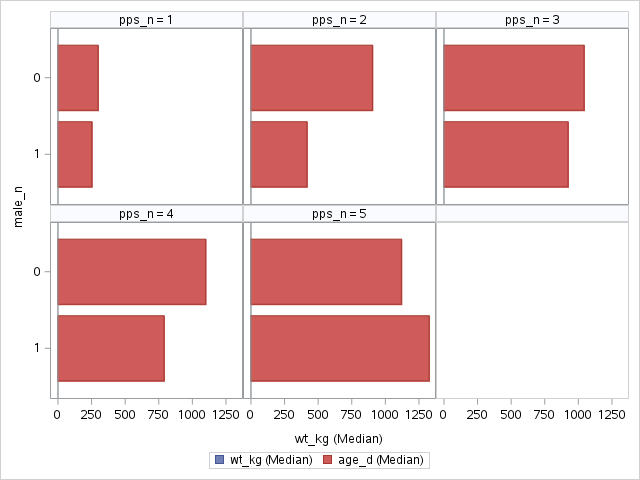

In [6]:


hr = sas.df2sd(df)  # the short form of: hr = sas.dataframe2sasdata(hr_pd)
hr.columnInfo()
# hr.head()
# hr.means()
# hr.bar('age_d')
# hr.hist('wt_kg')
# hr.heatmap('age_d', 'male_c')
c = sas.submitLST("""
proc sgpanel data=work._df;
    PANELBY pps_n;
    hbar male_n / response=wt_kg    stat=median;
    hbar male_n / response=age_d stat=median;
run;
""")

In [11]:
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import numpy as np

def apply_ztest(c1, c2, n1, n2):
    return proportions_ztest(
        count=[c1 , c2], 
        nobs=[n1, n2], 
        alternative='two-sided'
      )[1]

#create fake data
np.random.seed(1)
df = pd.DataFrame({
    'c1':np.random.randint(1,20,10),
    'c2':np.random.randint(1,50,10),
})
df['n1'] = df['c1']+np.random.randint(1,20,10)
df['n2'] = df['c2']+np.random.randint(1,50,10)


df['p_val'] = df.apply(lambda my_row: apply_ztest(my_row['c1'], my_row['c2'], my_row['n1'], my_row['n2']), axis=1)
print(df)

   c1  c2  n1  n2         p_val
0   6   2  18  12  3.118730e-01
1  12  13  23  21  5.151211e-01
2  13   8  28  31  9.852859e-02
3   9  46  28  48  2.104985e-09
4  10   7  15   8  2.784932e-01
5  12  26  22  44  7.246720e-01
6   6  21  24  30  1.015001e-03
7  16  38  17  63  8.279998e-03
8   1  19  15  33  9.129082e-04
9  17  21  27  69  3.387531e-03


In [15]:
my_data = []
# initialize list of lists
my_data = [[220, 16, 812, 62]]
# Create the pandas DataFrame
my_data = pd.DataFrame(my_data, columns=['c1', 'c2', 'n1', 'n2'])
print(my_data)

my_data['p_val'] = my_data.apply(lambda my_row: apply_ztest(my_row['c1'], my_row['c2'], my_row['n1'], my_row['n2']), axis=1)
print(my_data)

    c1  c2   n1  n2
0  220  16  812  62
    c1  c2   n1  n2     p_val
0  220  16  812  62  0.825844


In [ ]:
total_proportion_survived = (data.Survived == "Survived").mean()
num_female = data[data.Sex=="female"].shape[0]
num_male = data[data.Sex=="male"].shape[0]
assert num_female*total_proportion_survived>10, "Assumptions not met"
assert num_male*total_proportion_survived>10, "Assumptions not met"
assert num_female*(1-total_proportion_survived)>10, "Assumptions not met"
assert num_male*(1-total_proportion_survived)>10, "Assumptions not met"
Standard Error for Population Proportions

The sample standard error for the difference in population is(the code follows):


Standard error for difference in Population Proportions.
#This table helps us to calculate the SE.
prop = data.groupby("Sex")["Survived"].agg([lambda z: np.mean(z=="Survived"), "size"])
prop.columns = ['proportions_survived','total_counts']
prop.head()

#Calculating standard error
 
variance = total_proportion_survived * (1 - total_proportion_survived)
standard_error = np.sqrt(variance * (1 / prop.total_counts.female + 1 / prop.total_counts.male))
print("Sample Standard Error",standard_error)

Computed Sample Standard Error
Getting the Test Statistic

After we check that the assumptions hold true, its the time to calculate the test statistic for this hypothesis test.


Test Statistic
The hypothesized estimate is 0(null hypothesis) and we have the proportions of survived males and females to get the best estimate(the difference).

# Calculate the test statistic 
best_estimate = (prop.proportions_survived.female - prop.proportions_survived.male)
print("The best estimate is",best_estimate)
hypothesized_estimate = 0
test_stat = (best_estimate-hypothesized_estimate) / standard_error
print("Computed Test Statistic is",test_stat)

Best Estimate and Test Statistic Computation
This implicates that our sample proportion difference estimate is ~16.2 standard errors above our hypothesized estimate !

Now we need to convert it a p-value and test our hypothesis based on significance level(set by us).

P-Value Computation

We get the p-value computed based on the standard normal distribution(zero mean and unit standard deviation) often called a z-test. We get the p values from both the tails of the distribution(depends on alternative hypothesis).

# Calculate the  p-value
pvalue = 2*dist.norm.cdf(-np.abs(test_stat)) # Multiplied by two indicates a two tailed testing.
print("Computed P-value is", pvalue)

P-value from Standard Normal Distribution
Inference

We can clearly see that p-value is way lesser than the significance level of 0.10. So we can safely reject the null hypothesis in favour of the alternative hypothesis. We infer that the difference in proportions between that of survived females to that of survived males is significant and certainly not equal to zero(females might had had better access to lifeboats).

References

Khan Academy Hypothesis Testing of Proportions
Statistical Hypothesis Testing Wiki
3. P-value calculation for z-test(Python)

Data Science
Python
Hypothesis Testing
Statistics
82






In [18]:
my_data1 = []
# initialize list of lists
my_data1 = [['female', 0.742038, 314], ['male', 0.188908, 577]]
# Create the pandas DataFrame
my_data1 = pd.DataFrame(my_data1, columns=['sex', 'proportions_survived', 'total_counts'])
print(my_data1)

      sex  proportions_survived  total_counts
0  female              0.742038           314
1    male              0.188908           577


In [ ]:
#Calculating standard error
 
variance = total_proportion_survived * (1 - total_proportion_survived)
standard_error = np.sqrt(variance * (1 / prop.total_counts.female + 1 / prop.total_counts.male))
print("Sample Standard Error",standard_error)

In [17]:
count = np.array([220, 16])
nobs = np.array([812, 62])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.5f}'.format(pval))

0.82584


In [8]:
total_proportion_survived = (data.Survived == "Survived").mean()
num_female = data[data.Sex=="female"].shape[0]
num_male = data[data.Sex=="male"].shape[0]
assert num_female*total_proportion_survived>10, "Assumptions not met"
assert num_male*total_proportion_survived>10, "Assumptions not met"
assert num_female*(1-total_proportion_survived)>10, "Assumptions not met"
assert num_male*(1-total_proportion_survived)>10, "Assumptions not met"

#This table helps us to calculate the SE.
prop = data.groupby("Sex")["Survived"].agg([lambda z: np.mean(z=="Survived"), "size"])
prop.columns = ['proportions_survived','total_counts']
prop.head()

#Calculating standard error
 
variance = total_proportion_survived * (1 - total_proportion_survived)
standard_error = np.sqrt(variance * (1 / prop.total_counts.female + 1 / prop.total_counts.male))
print("Sample Standard Error",standard_error)

# Calculate the test statistic 
best_estimate = (prop.proportions_survived.female - prop.proportions_survived.male)
print("The best estimate is",best_estimate)
hypothesized_estimate = 0
test_stat = (best_estimate-hypothesized_estimate) / standard_error
print("Computed Test Statistic is",test_stat)


# Calculate the  p-value
pvalue = 2*dist.norm.cdf(-np.abs(test_stat)) # Multiplied by two indicates a two tailed testing.
print("Computed P-value is", pvalue)






,c1,c2,n1,n2,p_val
0,6,2,18,12,0.155936
1,12,13,23,21,0.742439
2,13,8,28,31,0.049264
3,9,46,28,48,1.000000
4,10,7,15,8,0.860753
5,12,26,22,44,0.637664
6,6,21,24,30,0.999492
7,16,38,17,63,0.004140
8,1,19,15,33,0.999544
9,17,21,27,69,0.001694


In [ ]:
# Cntrl 1 Comment Out
# edj.rename(columns = {'SYMBOL/CUSIP':'ticker','SHARES':'vol'}, inplace = True) 
# print(type(df))
# print(df.head(2))
# df.info()
# for i in df.columns:
#     print(i)


# npl['sex'] = npl['GENDER'].astype(int)
# npl.info()
# npl = npl.astype({'wt_kgs': 'float64'})
# npl['wt'] = npl['wt_kgs'].apply(lambda x: float(x.split()[0].replace('', 'NaN')))
# npl['pps_n'].describe()
# npl = npl.astype({'wt': 'float64'})
# npl.describe()

# all_df = all_df.astype({'recall': 'float64', 'ds_size': 'float64'})
# all_df.info()

# all_df['monht_year'] = pd.to_datetime(all_df['dt']).dt.to_period("M")

# all_df['condition'] = ""

# all_df.loc[(all_df['tp'] ==1), "condtion"] = 'tp'

# all_df['gt'] = all_df.xxx.apply(lambda x: 1 if x == "Y" else 0)
# all_df = all_df[all_df.coumns[~all_df.columns.isin(['xxx'])]]


# month_data = []
# gridvars = ['tp', 'tn', 'fn', 'fp']
# for i in time_mo:
#     my_mo = df.loc[(df[month_year] == i)]
#     print(my_mo)
#     print(len(my_mo))
#     df_in = my_modfs = df_in[gridvars].sum
#     dfs = dfs.to_frame()
#     dft = dfs.transpose()
#     dft['tot'] = dft.sum(axis=1)
#     dft['tpfn'] = dft.loc[:,['tp','fn']].sum(axis=1)
#     dft['tpfp'] = dft.loc[:,['tp','fp']].sum(axis=1)
#     dft['fpfn'] = dft.loc[:,['fp','fn']].sum(axis=1)
#     dft['recall'] = dft.tp / dft.tpfn
#     dft['precision'] = dft.tp / dft.tpfn
#     dft['recall'] = dft.tp / dft.tpfp
#     dft['pct_gtc'] = dft.tpfn / dft.tot
#     dft['pct_nsc'] = dft.fpfn / dft.tot
#     dft['month_id'] = i
#     month_data.append(dft)


# month_df.rename(column={0:'tp', 1: 'tn'}, inplace = True)

# df.loc[(df['gt'] == 1) & (df['mod'] == 1), 'tp'] = 1
# df.loc[(df['gt'] == 0) & (df['mod'] == 0), 'tn'] = 1

# df['condition'] = ""
# df.loc[(df['Price'] <=100) & (df['Category']=='A'), "Flag"] = 'X'
# df.loc[(df['tp'] ==1), "condition"] = 'tp'
# df.loc[(df['tn'] ==1), "condition"] = 'tn'


# def pef_c(row):
#     if  row['date'] < '2020-03-01':
#         val = 'pre'
#     elif row['date'] >= '2020-03-01' and row['date'] < '2022-03-01':
#         val = 'during'
#     elif row['date'] >= '2022-03-01':
#         val = 'post'
#     else:
#         val = 'error'
#     return val



# def checkAge(inpAge, minAge):
#     if(inpAge>=minAge):
#         return 'senior'
#     else:
#         return 'fresher'
    
# npl['age_ty']=npl['AGE_DAYS'].apply(checkAge, args=(25,))

 
# Priting data
# print(npl.male_n)
# print(npl.male_c)

# npl['sex'] = npl['GENDER'].astype(str)


# npl['male_c'] = (dataFrame.loc[(dataFrame['Salary']>=100000) & (dataFrame['Age']< 40) & (dataFrame['JOB'].str.startswith('D')),
#                     ['Name','JOB']])
# ['sex'] = npl['GENDER'].astype(int)

# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# aov1 = ols('age_d ~ C(gender)',data=df).fit()
# table = sm.stats.anova_lm(aov1, typ=2) # Type 2 Anova DataFrame
# print(table)

from saspy import SASsession
sas = SASsession(results='HTML')
print(type(sas))



# Tukey Pariwise Troubleshooting Testing


# anova_df = df.loc[:,['wt_kg','shunt_ty','male_n']].dropna()

# test = stat()
# # test.tukey_hsd(df=df, res_var='wt_kg', xfac_var='shunt_ty', anova_model='wt_kg ~ C(shunt_ty)')
# test.tukey_hsd(df=anova_df, res_var='wt_kg', xfac_var=['shunt_ty','male_n'], anova_model='wt_kg ~ C(shunt_ty) + C(male_n)')
# ts = test.tukey_summary
# ts


# test.anova_stat(df=df, res_var='wt_kg', anova_model='wt_kg ~ C(shunt_ty)')
# test.anova_summary




# This works but with dropna()
# test=pairwise_tukeyhsd(anova_df["wt_kg"], anova_df['shunt_ty'])
# print(test)
# This Still kicks out 1-4
# test2=pairwise_tukeyhsd(df["wt_kg"], df['shunt_ty'])
# print(test2)

# sns.boxplot(x="shunt_ty_c", y="wt_kg", data=df, palette="Set3") 







# This gives everything but one-way ANOVA only
# anova_df.pairwise_tukey(dv='wt_kg', between=['shunt_ty']).round(3)






# THis just gives overall f-test
# model = ols('wt_kg ~ C(shunt_ty)', data=anova_df).fit()
# sm.stats.anova_lm(model, type=2)

# # This works but still drops lower classes unless dropna() is used
# mc = MultiComparison(df['wt_kg'], df['shunt_ty'])
# Working but must be dropna()
# mc = MultiComparison(anova_df['wt_kg'], anova_df['shunt_ty'])
# mcresult=mc.tukeyhsd(0.05)
# mcresult.summary()







# ANOVA results with combinations of 2 groups:
# formula = 'wt_kg ~ C(shunt_ty_c) + C(male_c) + C(shunt_ty_c):C(male_c)'
# lm = ols(formula, anova_df).fit()
# table = sm.stats.anova_lm(lm, typ=2)
# print(table)


# anova_df['combination'] = anova_df['shunt_ty_c'] + " / " + anova_df['male_c'] 

# # perform multiple pairwise comparison (Tukey HSD)
# m_comp = pairwise_tukeyhsd(endog=anova_df['wt_kg'], groups=anova_df['combination'], alpha=0.05)

# # coerce the tukeyhsd table to a DataFrame
# tukey_data = pd.DataFrame(data=m_comp._results_table.data[1:], columns = m_comp._results_table.data[0])

# group1_comp =tukey_data.loc[tukey_data.reject == True].groupby('group1').reject.count()
# group2_comp = tukey_data.loc[tukey_data.reject == True].groupby('group2').reject.count()
# tukey_data = pd.concat([group1_comp, group2_comp], axis=1)

# tukey_data = tukey_data.fillna(0)
# tukey_data.columns = ['reject1', 'reject2']
# tukey_data['total_sum'] = tukey_data.reject1 + tukey_data.reject2

# # just show the top 20 results
# tukey_data.sort_values('total_sum',ascending=False).head(20)

